In [1]:
try:
    from scipy.datasets import face  # 从scipy库中引入img图像
except ImportError:
    from scipy.misc import face

img = face()

In [2]:
type(img) 
# 这里的ndarray表示是np中的n维数组存储类型，其中包括一些核心的属性shape, dtype

numpy.ndarray

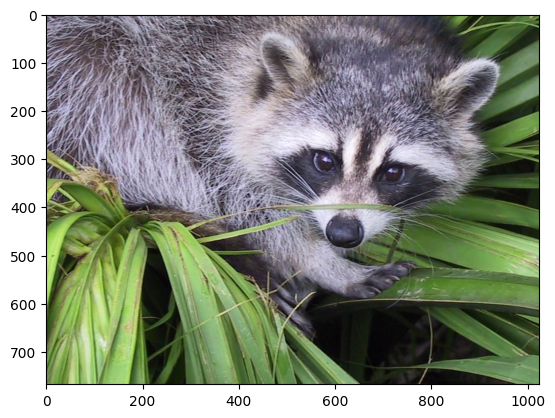

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 
# 魔术命令，让所有的图片直接显示在单元格下方

plt.imshow(img)
plt.show()

In [4]:
img.shape

(768, 1024, 3)

In [5]:
img.ndim # numpy中ndarray类的一个属性，可以看出由几个维度

3

In [6]:
img[:, :, 0] # rgb读取，这里读取的是图像red值

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]],
      shape=(768, 1024), dtype=uint8)

In [7]:
img[:, :, 0].shape # 可以看出单个颜色是二维的矩阵表示

(768, 1024)

In [8]:
img_array = img / 255
img_array.max(), img_array.min() # 对图形进行“归一化”处理

(np.float64(1.0), np.float64(0.0))

In [9]:
img_array.dtype # dtype是ndarray的核心属性，显示该np数组存储的具体每个元素是什么类型

dtype('float64')

In [10]:
# 分别获取rgb的颜色矩阵
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

In [11]:
# linalg就是一个np中关于线性代数的计算模块
from numpy import linalg

In [12]:
# @和*在np中并不相通，@表示矩形相乘，而*表示np中广播中的元素依次对应相乘
img_gray =img_array @ [0.2126, 0.7152, 0.0722]

In [13]:
# 通过矩阵相乘的维度规则，也可以证实@与*的区别
img_gray.shape

(768, 1024)

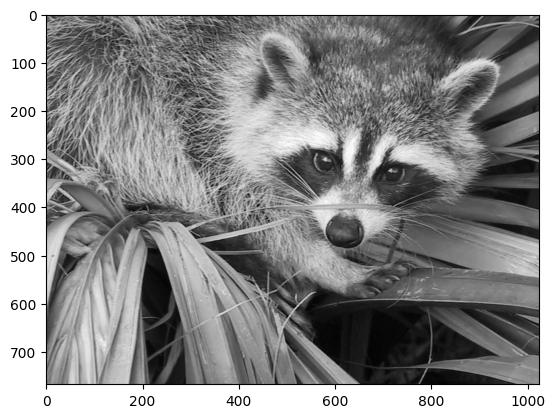

In [14]:
plt.imshow(img_gray, cmap="gray")
plt.show()

In [15]:
# 这个是关于矩阵的奇异分解，注意img_gray是2dims的，且svd函数返还的U、Vt是二维举证，但是s是主对角线元素的一维函数而非一个二维矩阵
U, s, Vt = linalg.svd(img_gray)

In [16]:
U.shape, s.shape, Vt.shape # 查看各个奇异分解后的形状

((768, 768), (768,), (1024, 1024))

In [17]:
import numpy as np

Sigma = np.zeros((U.shape[1], Vt.shape[0])) # Sigma是零矩阵，但是大小s原本应该形成的矩阵大小相同
np.fill_diagonal(Sigma, s) # 利用fill_diagonal和s包含的主对角线信息对Sigma进行填充，得出一个对角矩阵

In [18]:
# 通过计算下式来看由于浮点数影响导致的范数分解误差是否在可接受范围内
linalg.norm(img_gray - U @ Sigma @ Vt) 
# norm是计算矩阵范数的方式，默认计算L2范数。 
# numpy中的@矩阵的乘法，*则是矩阵对应元素简单的相乘

np.float64(1.3754827974611223e-12)

In [19]:
# allclose is NumPy 中用于比较两个数组是否在允许的误差范围内近似相等的函数
np.allclose(img_gray, U @ Sigma @ Vt)

True

In [20]:
img_gray

array([[0.45209882, 0.51876549, 0.57815529, ..., 0.47355843, 0.51387529,
        0.54524784],
       [0.33250118, 0.41485412, 0.49104706, ..., 0.46907059, 0.53181569,
        0.57887451],
       [0.26975608, 0.35210902, 0.43446196, ..., 0.47104157, 0.53378667,
        0.57692392],
       ...,
       [0.39135137, 0.40982196, 0.46304078, ..., 0.5706549 , 0.56673333,
        0.5692549 ],
       [0.37452784, 0.41374353, 0.47675608, ..., 0.56840078, 0.56419608,
        0.56419608],
       [0.37509412, 0.42158667, 0.47340078, ..., 0.56447922, 0.56027451,
        0.55635294]], shape=(768, 1024))

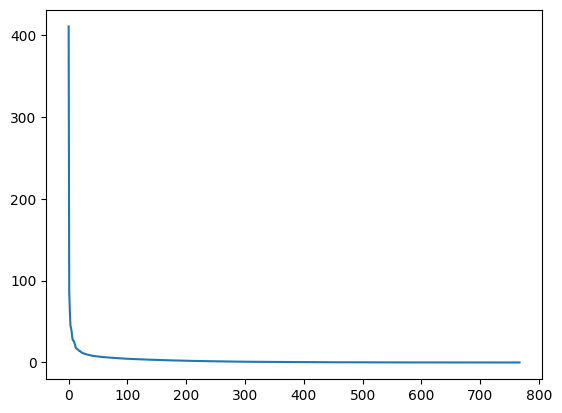

In [21]:
plt.plot(s)
plt.show()
# 传入一个一维数组时，默认会将数组的值作为 y 轴数据，并自动生成对应的 x 轴索引

In [23]:
k = 50 # 为迭代的可能次数

In [24]:
approx = U @ Sigma[:, :k] @ Vt[:k, :]
# Sigma[:, :k]截取的矩阵是可以与U进行矩阵乘法的，但是需要对Vt进行截取处理。
# 这个公式本质是svd在图像压缩处理的应用

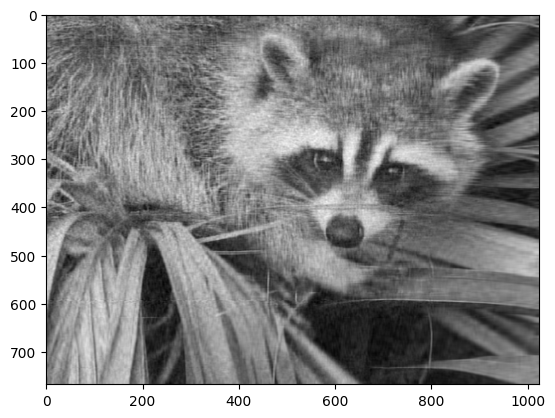

In [25]:
plt.imshow(approx, cmap="gray")
plt.show()

In [26]:
img_array.shape

(768, 1024, 3)

In [27]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
# transpose函数是改变多维数组维度顺序的方法
img_array_transposed.shape

(3, 768, 1024)

In [28]:
U, s, Vt = linalg.svd(img_array_transposed) # 对彩色图像的奇异分解

In [29]:
U.shape, s.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

In [30]:
Sigma = np.zeros((3, 768, 1024) # 分别对rgb进行s矩阵生成
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

In [31]:
reconstructed = U @ Sigma @ Vt # 同理与灰度处理过程

In [32]:
reconstructed.shape

(3, 768, 1024)

In [33]:
reconstructed.min(), reconstructed.max()

(np.float64(-4.587781164081678e-15), np.float64(1.000000000000004))

<function matplotlib.pyplot.show(close=None, block=None)>

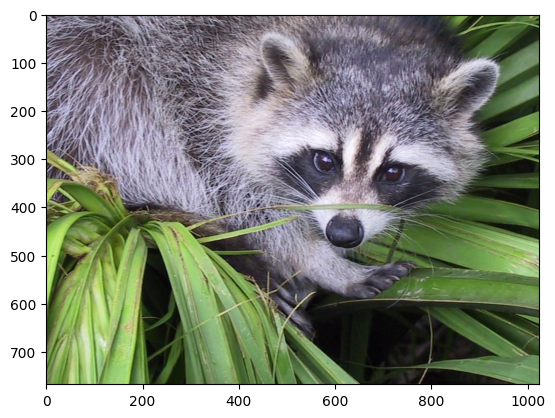

In [34]:
reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))
plt.show

In [35]:
k = 10
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]

In [36]:
approx_img.shape

(3, 768, 1024)

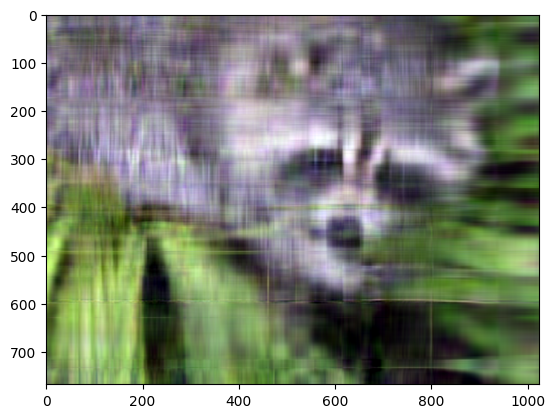

In [37]:
approx_img = np.clip(approx_img, 0, 1)
plt.imshow(np.transpose(approx_img, (1, 2, 0)))
plt.show()